# __New York Restaurant Analysis by Cuisine__

Import required libraires

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib 
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup
import lxml
import math
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import folium
import json

Ready the client id, secret and version required for foursqaure api 

In [238]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180323' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Fetch New York neighborhoods data

In [3]:
neighborhoods = requests.get('https://cocl.us/new_york_dataset').json()
neighborhoods

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
# assign relevant part of JSON to areas
areas = neighborhoods['features']

# tranform areas into a dataframe
areas = json_normalize(areas)
df = pd.DataFrame(columns=["name","borough","lat","lon"])
for i in range(areas.shape[0]):
    df.at[i,["lon","lat"]] = areas['geometry.coordinates'][i]
df[["name","borough"]]=areas[['properties.name','properties.borough']]
df


,name,borough,lat,lon
0,Wakefield,Bronx,40.8947,-73.8472
1,Co-op City,Bronx,40.8743,-73.8299
2,Eastchester,Bronx,40.8876,-73.8278
3,Fieldston,Bronx,40.8954,-73.9056
4,Riverdale,Bronx,40.8908,-73.9126
...,...,...,...,...
301,Hudson Yards,Manhattan,40.7567,-74.0001
302,Hammels,Queens,40.5873,-73.8055
303,Bayswater,Queens,40.6113,-73.766
304,Queensbridge,Queens,40.7561,-73.9456


Fetch top 20 popular restaurants in each neighborhood using foursquare api

In [5]:
the_venues=[]
x=1
for name,borough,lat,lon in zip(df['name'],df['borough'],df['lat'],df['lon']):
    search_query = 'restaurant'
    radius = 1000
    LIMIT = 20
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    print(x," ",len(venues))
    x=x+1
    for a in range(len(venues)):
        if venues[a]['categories'] != []:
            the_venues.append([name,borough,lat,lon,venues[a]['name'],venues[a]['categories'][0]['shortName']])

venues_df = pd.DataFrame(the_venues)
venues_df

1   20
2   10
3   12
4   20
5   17
6   20
7   20
8   20
9   20
10   20
11   14
12   20
13   9
14   20
15   20
16   20
17   20
18   20
19   20
20   20
21   20
22   20
23   20
24   20
25   12
26   20
27   20
28   3
29   15
30   20
31   20
32   20
33   20
34   20
35   20
36   20
37   13
38   19
39   20
40   18
41   10
42   20
43   13
44   20
45   20
46   20
47   20
48   20
49   20
50   20
51   20
52   20
53   20
54   20
55   20
56   20
57   20
58   20
59   20
60   20
61   20
62   20
63   20
64   20
65   20
66   20
67   20
68   5
69   20
70   20
71   20
72   20
73   20
74   7
75   20
76   20
77   1
78   20
79   20
80   20
81   20
82   20
83   14
84   17
85   20
86   2
87   20
88   20
89   20
90   20
91   20
92   3
93   20
94   20
95   20
96   20
97   20
98   20
99   20
100   20
101   20
102   20
103   20
104   20
105   20
106   20
107   20
108   20
109   20
110   20
111   20
112   20
113   20
114   20
115   20
116   20
117   20
118   20
119   20
120   20
121   20
122   20
123   20
124   20

,0,1,2,3,4,5
0,Wakefield,Bronx,40.894705,-73.847201,Bay 241 Restaurant & Lounge,Caribbean
1,Wakefield,Bronx,40.894705,-73.847201,Kaieteur Restaurant & Bakery,Caribbean
2,Wakefield,Bronx,40.894705,-73.847201,Big Daddy's Caribbean Taste Restaurant,Caribbean
3,Wakefield,Bronx,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,Caribbean
4,Wakefield,Bronx,40.894705,-73.847201,Cool Running Restaurant,Food
...,...,...,...,...,...,...
4689,Fox Hills,Staten Island,40.617311,-74.081740,A and R Pizzeria Restaurant,Food
4690,Fox Hills,Staten Island,40.617311,-74.081740,Wazobia Restaurant,African
4691,Fox Hills,Staten Island,40.617311,-74.081740,Al-Humza,Indian
4692,Fox Hills,Staten Island,40.617311,-74.081740,Campo Bello Restaurante,Spanish


See what types of restaurants we have fetched

In [104]:
venues_df.columns = ["neighborhood","borough","lat","lon","name","type"]
for i in range(len(venues_df["type"].unique())):
    print(i,': ',venues_df["type"].unique()[i])

0 :  Caribbean
1 :  Food
2 :  Restaurant
3 :  American
4 :  Latin American
5 :  Spanish
6 :  Asian
7 :  Seafood
8 :  Chinese
9 :  Sandwiches
10 :  Diner
11 :  Kitchen Supply
12 :  Nightlife
13 :  Japanese
14 :  Pizza
15 :  Mexican
16 :  Sushi
17 :  Thai
18 :  Café
19 :  Deli / Bodega
20 :  Indian
21 :  Italian
22 :  Pub
23 :  Halal
24 :  Tanning Salon
25 :  Food Service
26 :  African
27 :  Bakery
28 :  Lounge
29 :  Eastern European
30 :  Design
31 :  Racetrack
32 :  Bar
33 :  Paella
34 :  Nightclub
35 :  Southern / Soul
36 :  Breakfast
37 :  Sports Bar
38 :  Tacos
39 :  South Indian
40 :  Middle Eastern
41 :  Neighborhood
42 :  Building
43 :  Coffee Shop
44 :  Historic Site
45 :  Laundry
46 :  Hookah Bar
47 :  Yemeni Restaurant
48 :  Shop
49 :  Cocktail
50 :  Hotpot
51 :  Greek
52 :  Dive Bar
53 :  Malay
54 :  Polish
55 :  Turkish
56 :  Caucasian
57 :  Russian
58 :  Fast Food
59 :  Mediterranean
60 :  Steakhouse
61 :  Office
62 :  Vegetarian / Vegan
63 :  Indian Chinese
64 :  Pakistani

Some restaurants have type as "food" which is not useful so lets try to find their cuisine by their name

In [223]:
data =venues_df.copy() 
types = data["type"].unique()[[0,3,4,6,7,8,9,13,14,15,16,17,20,21,26,29,38,39,40,47,51,52,54,55,56,57,59,60,61,64,69,71,77,78,79,80,81,83,86,87,88,90,91,92,93,98,99,100,103,106,107,108,110,111,115,117,118,119,120,123,127,129]].tolist()
types_ext=["Jamaican","West Indian","Pizzeria","Coffee","Deli"]
types_ext_rep=["Caribbean","Caribbean","Pizza","Coffee Shop","Deli / Bodega"]

data[ (data["name"].str.contains('|'.join(types),case=False)) &(data['type']=='Food') ].head(10)


,neighborhood,borough,lat,lon,name,type
39,Eastchester,Bronx,40.887556,-73.827806,Michael's Italian Family Restaurant,Food
162,Williamsbridge,Bronx,40.881039,-73.857446,Axum Italian Restaurant,Food
197,Pelham Parkway,Bronx,40.857413,-73.854756,Fresh Tortillas (Tex-Mex Express) & Japanese R...,Food
354,High Bridge,Bronx,40.836623,-73.926102,Eye Adom African and American Restaurant,Food
471,Morrisania,Bronx,40.823592,-73.901506,Food Bo Garden Chinese Restaurant,Food
482,Soundview,Bronx,40.821012,-73.865746,Lin Kee Hong Chinese Restaurant,Food
537,Parkchester,Bronx,40.837938,-73.856003,Tasties Caribbean American Restaurant,Food
577,Van Nest,Bronx,40.843608,-73.866299,Tasties Caribbean American Restaurant,Food
687,Schuylerville,Bronx,40.826580,-73.826203,Frenchy's Bar and Restaurant,Food
712,Castle Hill,Bronx,40.819014,-73.848027,Chinese King Restaurant,Food


In [224]:
p=0
for q in range(data.shape[0]):
    z=data.loc[q,'type']
    for a in types:
        if (a.lower() in data.loc[q,"name"].lower())&(data.loc[q,'type']=="Food"):
            z=a
            #print(z)
    for a in range(len(types_ext)):
        if (types_ext[a].lower() in data.loc[q,"name"].lower())&(data.loc[q,'type']=="Food"):
            z=types_ext_rep[a]
            #print(z)
    if(z!=data.loc[q,'type']):
        p=p+1
    data.loc[q,'type']=z
    
    
print("the type of ",p," restuarants whose type is unknown has been found using the names they have.")


the type of  82  restuarants whose type is unknown has been found using the names they have.


In [107]:
p_data = data.copy()

Lets one hot encode the types features

In [108]:
onehot=pd.get_dummies(p_data["type"])
onehot

,African,American,Arcade,Arepas,Art Gallery,Asian,Australian,BBQ,Bakery,Bar,...,Thai,Theater,Tibetan,Turkish,Ukrainian,Vegetarian / Vegan,Vietnamese,Wine Bar,Wings,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4690,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
onehot[["neighborhood","borough","lat","lon"]]=p_data[["neighborhood","borough","lat","lon"]]

In [110]:
fixed_columns = onehot.columns[-4:].tolist() + onehot.columns[:-4].tolist()
onehot = onehot[fixed_columns]
onehot


,neighborhood,borough,lat,lon,African,American,Arcade,Arepas,Art Gallery,Asian,...,Thai,Theater,Tibetan,Turkish,Ukrainian,Vegetarian / Vegan,Vietnamese,Wine Bar,Wings,Yemeni Restaurant
0,Wakefield,Bronx,40.894705,-73.847201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,Bronx,40.894705,-73.847201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,Bronx,40.894705,-73.847201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,Bronx,40.894705,-73.847201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,Bronx,40.894705,-73.847201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,Fox Hills,Staten Island,40.617311,-74.081740,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4690,Fox Hills,Staten Island,40.617311,-74.081740,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,Fox Hills,Staten Island,40.617311,-74.081740,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,Fox Hills,Staten Island,40.617311,-74.081740,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now finding the popular cuisines by their numbers

In [111]:
onehot.rename(columns={"Food":"Unknown"},inplace=True)
onehot.iloc[:,4:].sum().sort_values(axis=0,ascending=False).head(10)

Chinese           850
Unknown           581
Pizza             361
Caribbean         307
Italian           290
Restaurant        190
Spanish           183
Mexican           161
Latin American    157
American          146
dtype: int64

In [230]:
w = onehot.iloc[:,4:].sum().sort_values(axis=0,ascending=False)
del w["Restaurant"]
del w["Unknown"]
nums=w[:10].transpose().tolist()
types=w.to_frame()[:10].transpose().columns.tolist()

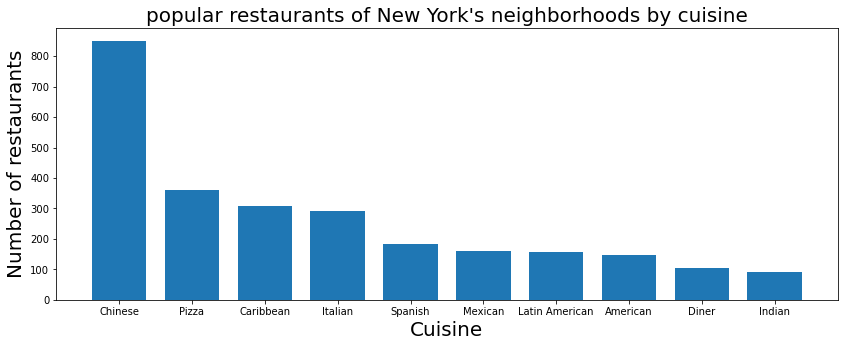

In [234]:
xpos=[4*x for x in range(10) ]
plt.figure(figsize=(14, 5))
plt.bar(xpos, nums,width=3)
plt.ylabel('Number of restaurants',fontsize=20)
plt.xlabel('Cuisine',fontsize=20)
plt.title("Popular restaurants of New York's neighborhoods by cuisine",fontsize=20)
plt.xticks(xpos,types)
plt.show()

Preparing the data for Kmeans clustering by grouping the data by neighborhood

In [201]:
onehotmean = onehot.groupby([ "neighborhood","borough","lat","lon" ]).mean().reset_index()

print(onehotmean.shape)
onehotmean

(301, 140)


,neighborhood,borough,lat,lon,African,American,Arcade,Arepas,Art Gallery,Asian,...,Thai,Theater,Tibetan,Turkish,Ukrainian,Vegetarian / Vegan,Vietnamese,Wine Bar,Wings,Yemeni Restaurant
0,Allerton,Bronx,40.865788,-73.859319,0.0,0.050000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,Staten Island,40.538114,-74.178549,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,Staten Island,40.549286,-74.185887,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,Staten Island,40.635325,-74.165104,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,Staten Island,40.596313,-74.067124,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Woodhaven,Queens,40.689887,-73.858110,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,Woodlawn,Bronx,40.898273,-73.867315,0.0,0.052632,0.0,0.00,0.0,0.052632,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,Woodrow,Staten Island,40.541968,-74.205246,0.0,0.000000,0.0,0.00,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,Woodside,Queens,40.746349,-73.901842,0.0,0.000000,0.0,0.05,0.0,0.050000,...,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This dataset is being prepared to help us visualize each neighbourbood's restaurants by their popular cuisine types

In [115]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = [ "neighborhood","borough","lat","lon" ]
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most common type of restaurant'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most common type of restaurant'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
datasorted=[]
datasorted = pd.DataFrame(columns=columns)
datasorted['neighborhood'] = onehotmean['neighborhood']
datasorted['borough'] = onehotmean['borough']
datasorted['lat'] = onehotmean['lat']
datasorted['lon'] = onehotmean['lon']
for ind in np.arange(onehotmean.shape[0]):
    row_categories = onehotmean.iloc[ind, :].iloc[4:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    datasorted.iloc[ind, 4:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(datasorted.shape)
datasorted

(301, 14)


,neighborhood,borough,lat,lon,1st Most common type of restaurant,2nd Most common type of restaurant,3rd Most common type of restaurant,4th Most common type of restaurant,5th Most common type of restaurant,6th Most common type of restaurant,7th Most common type of restaurant,8th Most common type of restaurant,9th Most common type of restaurant,10th Most common type of restaurant
0,Allerton,Bronx,40.865788,-73.859319,Spanish,Unknown,Mexican,Chinese,Restaurant,Racetrack,Bakery,Caribbean,Eastern European,Pizza
1,Annadale,Staten Island,40.538114,-74.178549,Pizza,Sushi,Food & Drink,Filipino,Fast Food,Falafel,Event Space,Event Services,Ethiopian,Entertainment
2,Arden Heights,Staten Island,40.549286,-74.185887,Pizza,Chinese,Ethiopian,Filipino,Fast Food,Falafel,Event Space,Event Services,Entertainment,Dim Sum
3,Arlington,Staten Island,40.635325,-74.165104,Pizza,Chinese,Ethiopian,Filipino,Fast Food,Falafel,Event Space,Event Services,Entertainment,Dim Sum
4,Arrochar,Staten Island,40.596313,-74.067124,Italian,Chinese,Mediterranean,Yemeni Restaurant,Event Services,Filipino,Fast Food,Falafel,Event Space,Ethiopian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Woodhaven,Queens,40.689887,-73.858110,Pizza,Mexican,Chinese,Unknown,Latin American,Restaurant,Spanish,Japanese,Italian,Eastern European
297,Woodlawn,Bronx,40.898273,-73.867315,Unknown,Caribbean,Chinese,Restaurant,American,Asian,Pub,Mexican,Halal,Seafood
298,Woodrow,Staten Island,40.541968,-74.205246,Chinese,Yemeni Restaurant,Event Services,Unknown,Filipino,Fast Food,Falafel,Event Space,Ethiopian,Dim Sum
299,Woodside,Queens,40.746349,-73.901842,Indian,South American,Latin American,Unknown,Pizza,Japanese,Mexican,Filipino,Spanish,Café


 Before clustering lets see the neighborhoods we are analysing.

In [116]:
geolocator = Nominatim(user_agent="NY")
location = geolocator.geocode("New York")
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [232]:


newmap = folium.Map(location=[latitude, longitude], zoom_start=11)
d=datasorted
print("The neighborhoods of New York whose data has been used")
# add markers to map
for lat, lng, borough, neighborhood in zip(d['lat'], d['lon'], d['borough'], d['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(newmap)  
    
newmap

The neighborhoods of New York whose data has been used


Now lets do the clustering.

In [207]:
clusterdata = onehotmean.drop(["neighborhood","borough","lat","lon"], 1)
kclusters = 6 #6 was chosen because it was the elbow part in the elbow test graph to chose the correct no of clusters.
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clusterdata) 

The clustering is done. Now lets try to understand what each cluster is.

In [225]:
final = datasorted
final["cluster num"]=kmeans.labels_
for k in range(kclusters):
    print("cluster number: ",k)
    print(final["1st Most common type of restaurant"][final["cluster num"]==k].head(20))



cluster number:  0
1      Pizza
2      Pizza
3      Pizza
5      Pizza
85     Pizza
115    Pizza
125    Pizza
133    Pizza
136    Pizza
216    Pizza
243    Pizza
248    Pizza
289    Pizza
Name: 1st Most common type of restaurant, dtype: object
cluster number:  1
7             Chinese
8             Chinese
9             Chinese
12            Chinese
14            Chinese
16            Chinese
17            Chinese
20              Pizza
21            Chinese
23            Chinese
38            Chinese
46    Southern / Soul
50            Chinese
53            Chinese
54            Chinese
59            Chinese
62            Chinese
63            Chinese
64            Chinese
67            Chinese
Name: 1st Most common type of restaurant, dtype: object
cluster number:  2
6            Mexican
10           Chinese
11    Middle Eastern
26     Grocery Store
29          American
34           Unknown
37    Latin American
42           Italian
45             Pizza
48           Italian
51          

What defines each cluster can be identified from above output very easily:<br>
__Cluster type: Number__<br>
 Pizza       :  0<br>
 Chinese     :  1<br>
 Mix         :  2<br>
 Caribean    :  3<br>
 Unknown     :  4<br>
 Italian     :  5<br>

Lets plot the neighborhoods in the map again but with color based on their cluster type/cuisine to see any geographical insights.

In [233]:
newmap = folium.Map(location=[latitude, longitude], zoom_start=10.5)
d=final
colors=["Blue","Green","Red","Yellow","White","Black"]
labels=["Pizza     ","Chinese   ","Mix       ","Caribean  ","Unknown   ","Italian   "]
print("Cluster type: color")
for n in range(0,len(colors)):
    print(labels[n]," : ",colors[n])
# add markers to map
for lat, lng, borough, neighborhood,n in zip(d['lat'], d['lon'], d['borough'], d['neighborhood'],d["cluster num"]):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[n],
        fill=True,
        fill_color=colors[n],
        fill_opacity=0.7,
        parse_html=False).add_to(newmap)  
    
newmap

Cluster type: color
Pizza       :  Blue
Chinese     :  Green
Mix         :  Red
Caribean    :  Yellow
Unknown     :  White
Italian     :  Black


It is evident from above map that the city can be somewhat be divided by area based on their most popular restaurants cuisines. 

Lets plot a bar graph to see the number of neighborhoods where the cuisines are the most popular.

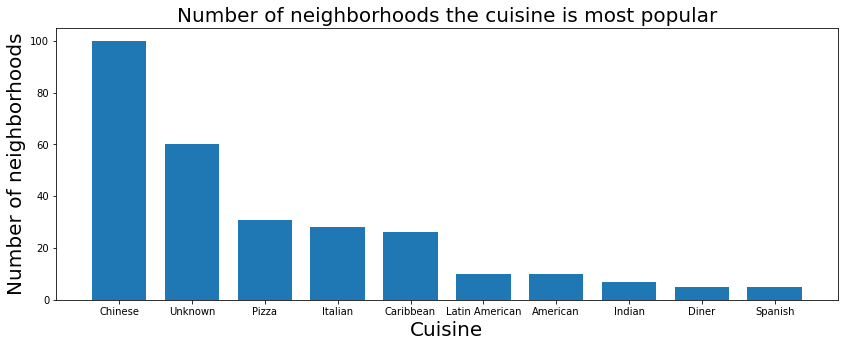

In [235]:
popular = pd.DataFrame(final[["1st Most common type of restaurant"]]).copy()
popular["count"]=1
popular = pd.DataFrame(popular.groupby(["1st Most common type of restaurant"],as_index=False)["count"].sum())
popular = popular.sort_values("count",ascending=False).reset_index()
del popular["index"]
types = popular["1st Most common type of restaurant"][:10].tolist()
nums= popular["count"][:10].tolist()
xpos=[4*x for x in range(10) ]
plt.figure(figsize=(14, 5))
plt.bar(xpos, nums,width=3)
plt.ylabel('Number of neighborhoods',fontsize=20)
plt.xlabel('Cuisine',fontsize=20)
plt.title("Number of neighborhoods the cuisine is most popular",fontsize=20)
plt.xticks(xpos,types)
plt.show()

Now for 2nd most popular.

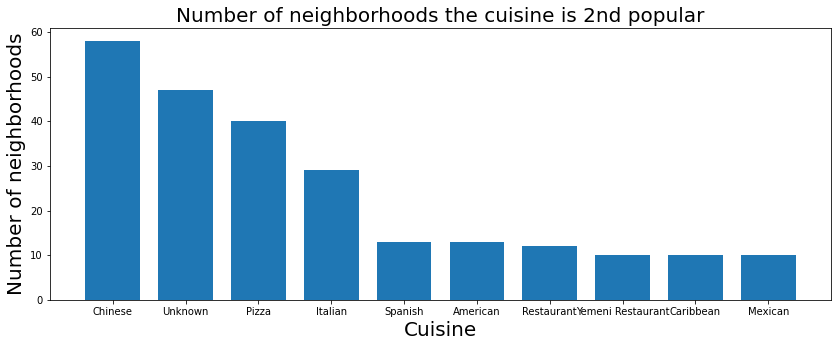

In [236]:
popular = pd.DataFrame(final[["2nd Most common type of restaurant"]]).copy()
popular["count"]=1
popular = pd.DataFrame(popular.groupby(["2nd Most common type of restaurant"],as_index=False)["count"].sum())
popular = popular.sort_values("count",ascending=False).reset_index()
del popular["index"]
types = popular["2nd Most common type of restaurant"][:10].tolist()
nums= popular["count"][:10].tolist()
xpos=[4*x for x in range(10) ]
plt.figure(figsize=(14, 5))
plt.bar(xpos, nums,width=3)
plt.ylabel('Number of neighborhoods',fontsize=20)
plt.xlabel('Cuisine',fontsize=20)
plt.title("Number of neighborhoods the cuisine is 2nd popular",fontsize=20)
plt.xticks(xpos,types)
plt.show()

And for 3rd most popular

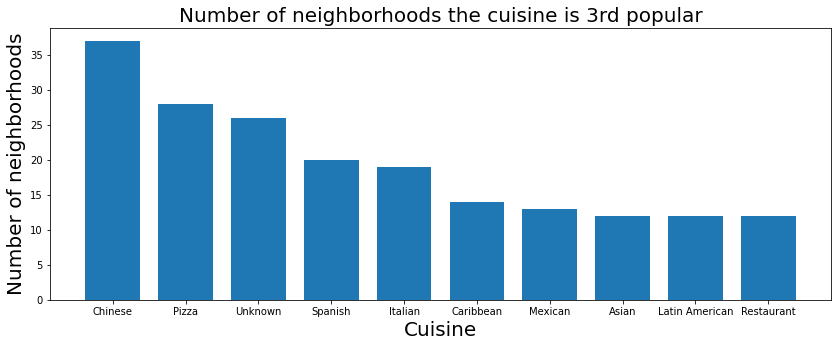

In [237]:
popular = pd.DataFrame(final[["3rd Most common type of restaurant"]]).copy()
popular["count"]=1
popular = pd.DataFrame(popular.groupby(["3rd Most common type of restaurant"],as_index=False)["count"].sum())
popular = popular.sort_values("count",ascending=False).reset_index()
del popular["index"]
types = popular["3rd Most common type of restaurant"][:10].tolist()
nums= popular["count"][:10].tolist()
xpos=[4*x for x in range(10) ]
plt.figure(figsize=(14, 5))
plt.bar(xpos, nums,width=3)
plt.ylabel('Number of neighborhoods',fontsize=20)
plt.xlabel('Cuisine',fontsize=20)
plt.title("Number of neighborhoods the cuisine is 3rd popular",fontsize=20)
plt.xticks(xpos,types)
plt.show()